# nmi | 2024 spring
## lecture 10 : GMRES


## 4.4 generalized minimum residual method (GMRES)

a good choice for large, sparse, nonsymmetric linear systems $Ax = b$.
</br></br>

why does orthogonality matter to a linear system? bc matrices with almost parallel column vectors tend to be ill-conditioned - ie, have large error magnification.
</br></br>

GMRES ~ orthogonal x2:
</br></br>

1.   backwards error minimized using least squares; and
2.   search space basis is reorthogonalized with each iteration.
</br>


### 4.4.1 iterative krylov method


GMRES is a krylov method - which relies on krylov space. krylov space is a vector space spanned by $\{r, Ar, . . . , A^k r\}$, where $r = b − Ax_0$ is the residual vector of the initial guess.
</br></br>

chebyshev minimized runge error by choosing roots; GMRES minimizes error by how it improves the initial guess. (note: not the initial guess itself but the increments to it.)
</br></br>

it looks at the krylov space spanned by $r$ and its products under nonsingular $A$. at each step $k$, the krylov space increases, its basis is reorthogonalized and least squares is applied. (ie, gram-schmidt & householder from 4.3.)
</br></br>


#### algorithm


```
x[0] = initial guess
r = b - A*x[0]
q[1] = r/||r|| # L2 norm
for k in range(m) # [0,m)
  y = A*q[k]
  for j in range(k) # [0,k)
    h[j,k] = transpose(q[j])•y
    y = y - h[j,k]*q[j]

  h[k+1,k] = ||y||

  if h[k+1,k] != 0
    q[k+1] = y/h[k+1,k]
  else
    # finish loop with this k and stop

  # lsq: H[k+1 eqns,k unknowns]
  min(||H*c[k] - transpose([||r|| 0 ... 0])||)

  # next x
  x[k] = Q[k]*c[k] + x[0]
```


where
</br></br>

*   $x_k$ is $\bar{x}$ for $Ax = b$;
</br></br>

and at step $k$,
</br></br>

*   $H$ is the $k+1$ x $k$ matrix minimized with least squares for $c$;
*   $Q_k$ is the $n$ x $k$ matrix of $k$ orthonormal colums; and
*   if $h_{k+1,k} = 0$, $k$ is final step and minimizing $H$ will return the exact solution of $Ax = b$.
</br></br>

gram-schmidt applied to $\{r,Ar,...,A^kr\}$ results in $AQ_k = Q_{k+1}H_k$. ie,
</br></br>


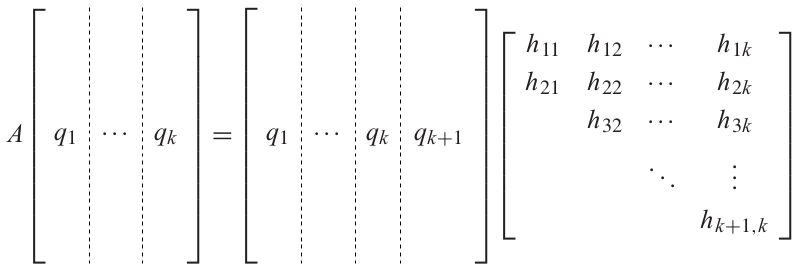

$A$ is $n$ x $n$, $Q_k$ is $n$ x $k$ and $H_k$ is $(k+1)$ x $k$. usually $k \ll n$.
</br></br>

$Q_k$, which spans the $k$-dimensional krylov space, is what is searched for the increment $x_{add}$ to $x_0$. ie, minimize the residual
</br></br>

$b - A(x_0 + x_{add}) = r - Ax_{add}$
</br></br>

by finding $c$ that minimizes
</br></br>

$||Ax_{add} - r||_2 = ||AQ_kc - r||_2 = ||Q_{k+1}H_kc - r||_2 = ||H_kc - Q^T_{k+1}r||_2$, giving the least squares problem below.
</br></br>


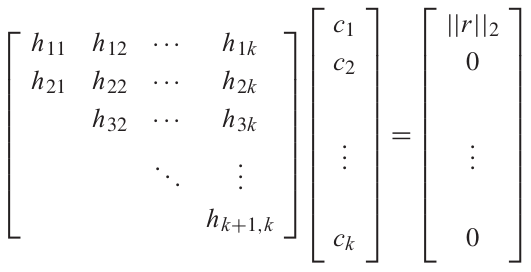

#### cost, usw

computationally, least squares is what costs the most but usually $k \ll n$, so usually its beneficial. when $h_{k+1,k} = 0$, the problem is zero and the solution $x_k$ exact.
</br></br>

also, bc of least squares, error $||b-Ax_k||_2$ decreases monotonically with $k$.
</br></br>

also, you can do the least squares part once in a while or only at the end if you only need an approximate solution. thats not very math-like but sometimes the real world gets impatient.
</br></br>

also, if a large $n$ runs too long, stop it and restart with $x_0 = x_{stopped}$.
</br></br>


### 4.4.2 preconditioned GMRES

for nonsymmetric $Ax = b$, solve $M^{-1}Ax = M^{-1}b$. ie, residual $r = M^{-1}(b-Ax_0)$ with krylov space iteration $w = M^{-1}Aq_k$.

#### algorithm


```
x[0] = initial guess
r = inverse(M)*(b − A*x[0])
q[1] = r/||r|| # L2 norm
for k in range(m) # [0,m)
  w = inverse(M)*A*q[k]
  for j in range(k) # [0,k)
    h[j,k] = transpose(w)•q[j]
    w = w − h[j,k]*q[j]

  h[k+1,k] = ||w||
  q[k+1] = w/h[k+1,k]

  # lsq: H[k+1 eqns,k unknowns]
  min(||H*c[k] − transpose([||r|| 0 ... 0])||)

  # next x
  x[k] = Q[k]*c[k] + x[0]
```



### miscellaney


<b>krylov subspaces</b>
</br>

* excellent summary! [@aerodynamic cfd](https://www.youtube.com/watch?v=B_eSPrYuIuU) (4m)
* rationale, proofs [@daniel an](https://www.youtube.com/watch?v=UgyLaAXqlQ4) (12m)
* textbook-like [@ocw.mit](https://ocw.mit.edu/courses/18-086-mathematical-methods-for-engineers-ii-spring-2006/41750e11021842bc972670e46cc949cc_am64.pdf) (homely but obviously diligent)
* math for the people [@etchzurich](https://people.math.ethz.ch/~mhg/pub/biksm.pdf) (not as homely)
* nerdy reading [@arxiv](https://arxiv.org/abs/1811.09025)
</br>

<b>GMRES</b>
</br>
* krylov for GMRES [@daniel an]()
* GMRES [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)
</br>